<a href="https://colab.research.google.com/github/kaivalyamule-github/test_demo/blob/master/Object_Detection_with_Tensorflowhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading modules

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy
import pandas as pd
import matplotlib.pyplot as plt

Loading model directly from the website

In [ ]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

Loading image and transforming it to rgb tensor format

In [ ]:
width = 800
height = 600

In [ ]:
img_url = "/content/drive/MyDrive/Colab Notebooks/Youtube Source Codes/Colab codes/elephant.jpg"
img = cv2.imread(img_url)
img = cv2.resize(img, (width, height))
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

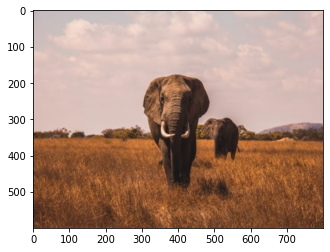

In [ ]:
plt.imshow(rgb)

In [ ]:
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
rgb_tensor = tf.expand_dims(rgb_tensor, 0)
rgb_tensor

<tf.Tensor: shape=(1, 600, 800, 3), dtype=uint8, numpy=
array([[[[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [228, 194, 185],
         [228, 194, 185]],

        [[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [228, 194, 185],
         [227, 193, 184]],

        [[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [227, 193, 184],
         [226, 192, 183]],

        ...,

        [[113,  68,  42],
         [110,  65,  41],
         [107,  62,  39],
         ...,
         [ 96,  51,  25],
         [108,  63,  36],
         [118,  72,  44]],

        [[116,  69,  41],
         [115,  68,  41],
         [113,  67,  42],
         ...,
         [ 86,  45,  21],
         [ 96,  55,  30],
         [103,  63,  37]],

        [[119,  70,  40],
         [118,  70,  42],
         [117,  70

loading labels

In [ ]:
label_path = "/content/drive/MyDrive/Colab Notebooks/Youtube Source Codes/Colab codes/labels.csv"
label = pd.read_csv(label_path, sep=';', index_col='ID')
labels = label['OBJECT (2017 REL.)']
print(labels)

ID
1         person
2        bicycle
3            car
4     motorcycle
5       airplane
         ...    
87      scissors
88    teddy bear
89    hair drier
90    toothbrush
91             -
Name: OBJECT (2017 REL.), Length: 91, dtype: object


detecting objects

In [ ]:
boxes, scores, classes, num_detection = detector(rgb_tensor)
num_detection

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [ ]:
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]

pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

displaying on image

In [ ]:
for score, (ymin, xmin, ymax, xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    img_boxes = cv2.rectangle(rgb, (xmin, ymin), (xmax,ymax), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label, (xmin, ymax-10), font, 1.5, (255, 0, 0), 2, cv2.LINE_AA )
    score_txt = f"{100 * round(score)}%"
    cv2.putText(img_boxes, score_txt, (xmin, ymax+10), font, 1.5, (0, 0, 255), 2, cv2.LINE_AA )

showing image

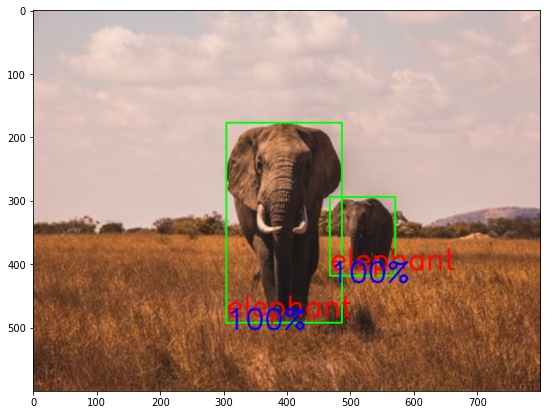

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(img_boxes)